In [1]:
import pandas as pd

import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb
import datetime as dt

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = (14, 6)
sb.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [3]:
address = 'US_Accidents.csv'
df = pd.read_csv(address, encoding = 'utf-8')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201,3,08/02/2016 05:46,08/02/2016 11:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201,2,08/02/2016 06:07,08/02/2016 06:37,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201,2,08/02/2016 06:49,08/02/2016 07:19,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201,3,08/02/2016 07:23,08/02/2016 07:53,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201,2,08/02/2016 07:39,08/02/2016 08:09,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


###### Basic Checking of the DataFrame such as datatpyes, shape, summary

In [4]:
df.shape

(1048575, 49)

In [5]:
df.dtypes

ID                        object
Source                    object
TMC                        int64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance                 float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature              float64
Wind_Chill               float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 49 columns):
ID                       1048575 non-null object
Source                   1048575 non-null object
TMC                      1048575 non-null int64
Severity                 1048575 non-null int64
Start_Time               1048575 non-null object
End_Time                 1048575 non-null object
Start_Lat                1048575 non-null float64
Start_Lng                1048575 non-null float64
End_Lat                  0 non-null float64
End_Lng                  0 non-null float64
Distance                 1048575 non-null float64
Description              1048574 non-null object
Number                   396803 non-null float64
Street                   1048575 non-null object
Side                     1048575 non-null object
City                     1048548 non-null object
County                   1048575 non-null object
State                    1048575 non-null object
Zipcode       

# This info() method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

In [7]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance,Number,Temperature,Wind_Chill,Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,0.0,0.0,1.048575e+06,396803.000000,1.024516e+06,173430.000000,1.023464e+06,1.027506e+06,1.019602e+06,840947.000000,121520.000000
mean,2.077632e+02,2.358323e+00,3.611783e+01,-9.517610e+01,NaN,NaN,1.476137e-01,5034.707258,6.197517e+01,26.590321,6.680177e+01,3.003558e+01,9.056237e+00,8.715629,0.059667
std,1.968127e+01,4.824762e-01,4.895696e+00,1.720663e+01,NaN,NaN,1.361161e+00,8757.437989,1.896201e+01,13.294340,2.182290e+01,2.210940e-01,2.729740e+00,5.034465,0.424239
min,2.000000e+02,0.000000e+00,2.457027e+01,-1.244931e+02,NaN,NaN,0.000000e+00,1.000000,-7.780000e+01,-55.100000,4.000000e+00,0.000000e+00,0.000000e+00,1.200000,0.000000
25%,2.010000e+02,2.000000e+00,3.300991e+01,-1.173272e+02,NaN,NaN,0.000000e+00,782.000000,5.000000e+01,20.000000,5.100000e+01,2.992000e+01,1.000000e+01,5.800000,0.000000
50%,2.010000e+02,2.000000e+00,3.541019e+01,-9.021603e+01,NaN,NaN,0.000000e+00,2499.000000,6.400000e+01,29.300000,6.900000e+01,3.003000e+01,1.000000e+01,8.100000,0.010000
75%,2.010000e+02,3.000000e+00,4.009613e+01,-8.093151e+01,NaN,NaN,1.000000e-02,6486.000000,7.590000e+01,36.800000,8.500000e+01,3.014000e+01,1.000000e+01,11.500000,0.040000
max,4.060000e+02,4.000000e+00,4.900076e+01,-6.865836e+01,NaN,NaN,3.336300e+02,851909.000000,1.670000e+02,45.200000,1.000000e+02,3.304000e+01,1.110000e+02,822.800000,10.800000


# Handle the missing values

# Detecting missing values easier, Pandas provides the isnull() and notnull() functions, which are also methods on Series and DataFrame objects

In [8]:
df.isnull().head(10)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False



It shows a False if something not null or missing and True if threre is something missing

Now lets take a look at the total number of missing values in each of the columns Here axis 0 is saying do a sum across the rows, which means down the columns. axis = 0 can be ignored as it is default.

In [9]:
df.isnull().sum(axis = 0)

ID                             0
Source                         0
TMC                            0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1048575
End_Lng                  1048575
Distance                       0
Description                    1
Number                    651772
Street                         0
Side                           0
City                          27
County                         0
State                          0
Zipcode                      140
Country                        0
Timezone                     581
Airport_Code               10290
Weather_Timestamp          17631
Temperature                24059
Wind_Chill                875145
Humidity(%)                25111
Pressure(in)               21069
Visibility(mi)             28973
Wind_Direction             17639
Wind_Speed(mph)           207628
Precipitat

In [10]:
df[df['End_Lat'].isnull()]['Source'].value_counts()

MapQuest         1034917
MapQuest-Bing      13658
Name: Source, dtype: int64

In [11]:
df['End_Lng'].isnull().value_counts()

True    1048575
Name: End_Lng, dtype: int64

# End_Lat , End_Lng whole data are missing at this two columns, so we can remove this two columns.

In [12]:
df.drop(['End_Lat','End_Lng'], axis = 1, inplace = True)
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance,Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201,3,08/02/2016 05:46,08/02/2016 11:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201,2,08/02/2016 06:07,08/02/2016 06:37,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201,2,08/02/2016 06:49,08/02/2016 07:19,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201,3,08/02/2016 07:23,08/02/2016 07:53,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201,2,08/02/2016 07:39,08/02/2016 08:09,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,False,False,False,False,True,False,Day,Day,Day,Day


# Remove column with missing data over 80% and remove the row if the column miss 80% data

In [13]:
def remove_column_row(col_name):
    null = df[col_name].isnull().sum()
    perc = null/len(df) * 100
    if(perc > 80):
        df.drop(col_name, axis = 1, inplace = True)
    else:
        df.dropna(subset = [col_name], inplace = True)

for item in df.columns:
    remove_column_row(item)

In [14]:
df.isnull().sum()

ID                       0
Source                   0
TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance                 0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature              0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
S

In [15]:
df.shape

(316424, 45)

###### Visualization

Number of Accidents in Different Wind Direction

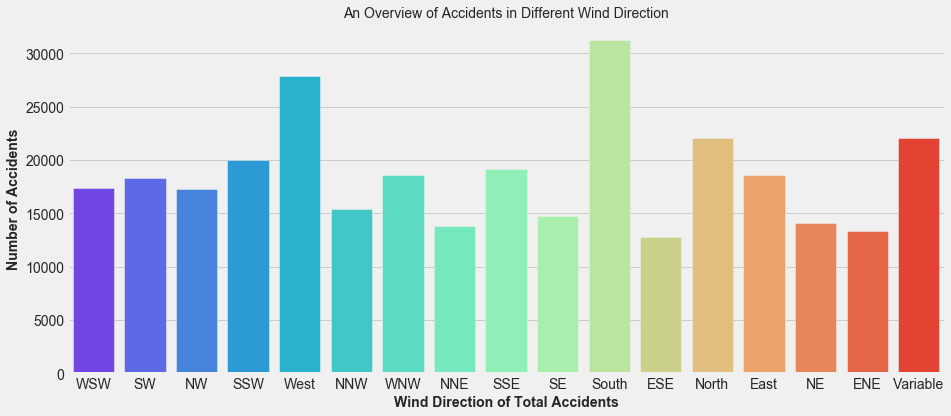

In [16]:
ax = sb.countplot('Wind_Direction', data = df, palette = 'rainbow')
ax.set_xlabel(xlabel = 'Wind Direction of Total Accidents', fontdict = {'fontsize': 14, 'fontweight':'bold'})
ax.set_ylabel(ylabel = 'Number of Accidents', fontdict = {'fontsize': 14, 'fontweight':'bold'})
ax.set_title(label = 'An Overview of Accidents in Different Wind Direction', fontsize = 14)
plt.show()

Day Night Comparison during Sunset and Sunrise

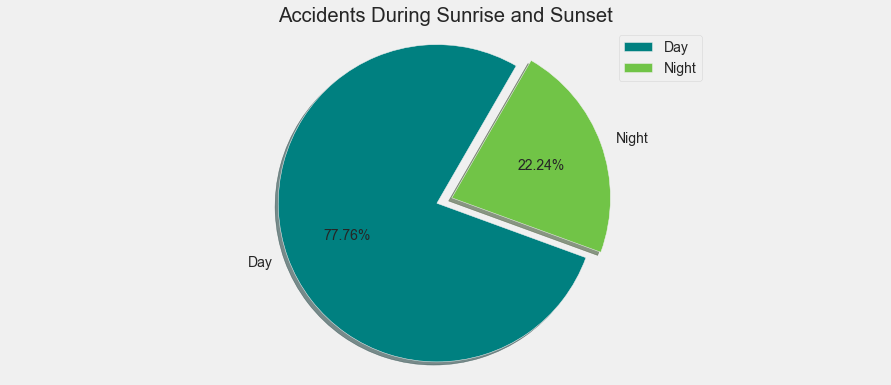

In [17]:
sunrise = df.loc[df['Sunrise_Sunset'] == 'Day'].count()[0]
sunset = df.loc[df['Sunrise_Sunset'] == 'Night'].count()[0]

labels = ['Day', 'Night']
explode = (0, 0.1)

plt.pie([sunrise, sunset], labels = labels, autopct = "%.2f%%", colors = ['#008080', '#71c447'],
                shadow=True, startangle = 60, explode=explode)

plt.title('Accidents During Sunrise and Sunset')
plt.legend(loc="best", bbox_to_anchor=(0.8, 1))
plt.axis('equal')
plt.show()

# Top Ten State With the most Accidents in US

In [18]:
df['State'].value_counts().head(10)

TX    51688
CA    42550
FL    24964
PA    22182
SC    18055
MI    16997
NC    16775
IL    15148
NY    11984
OK     9844
Name: State, dtype: int64

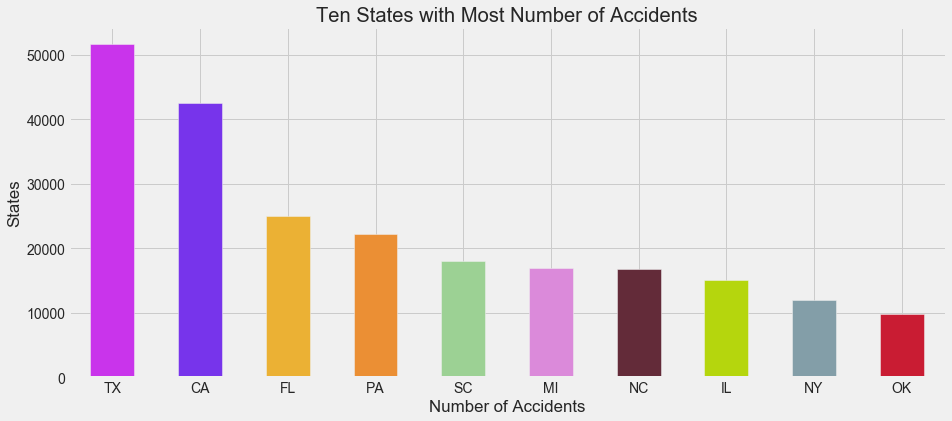

In [19]:
colors = ['#c934eb', '#7734eb', '#ebb134', '#eb8f34', '#9cd194', '#db8ada', '#632b39', '#b5d60d', '#839ea8', '#c91c33']
df['State'].value_counts().head(10).plot(kind = 'bar', color = colors, rot = 0)

plt.title('Ten States with Most Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('States')
plt.show()

# Creating Month and Year from starting time

In [20]:
df['date'] = df['Start_Time'].str.split(n = 1).str[0]
df['Date'] = pd.to_datetime(df['date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

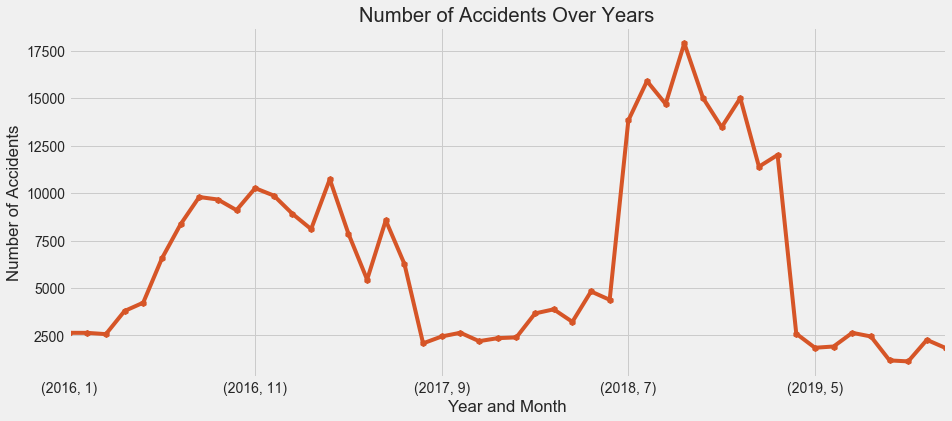

In [21]:
df.groupby(['Year','Month']).count()['ID'].plot(color = '#d65527', marker = 'h')

plt.title('Number of Accidents Over Years')
plt.xlabel('Year and Month')
plt.ylabel('Number of Accidents')
plt.show()

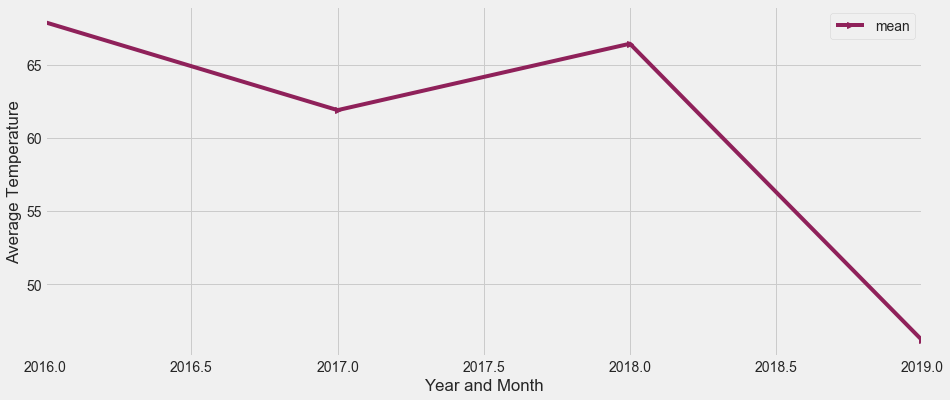

In [22]:
df.groupby(['Year']).Temperature.agg(['mean']).plot(color = '#8f215a', marker = '>')

plt.xlabel('Year and Month')
plt.ylabel('Average Temperature')
plt.show()

# Ten cities with Highest Accidents

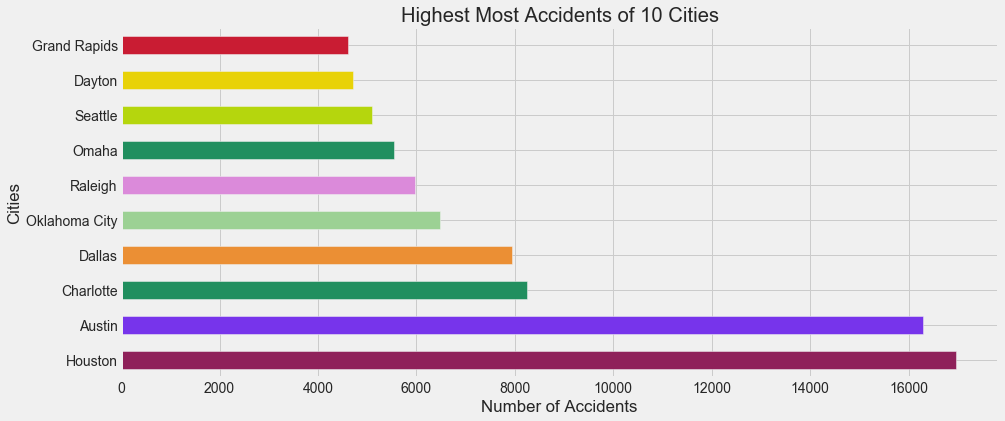

In [23]:
colors = ['#8f215a', '#7734eb', '#218f5f', '#eb8f34', '#9cd194', '#db8ada', '#218f5f', '#b5d60d', '#e8d207', '#c91c33']
df['City'].value_counts().head(10).plot(kind = 'barh', color = colors, rot = 0)

plt.title('Highest Most Accidents of 10 Cities')
plt.xlabel('Number of Accidents')
plt.ylabel('Cities')
plt.show()

 # Accidents Ratio from Different Sources

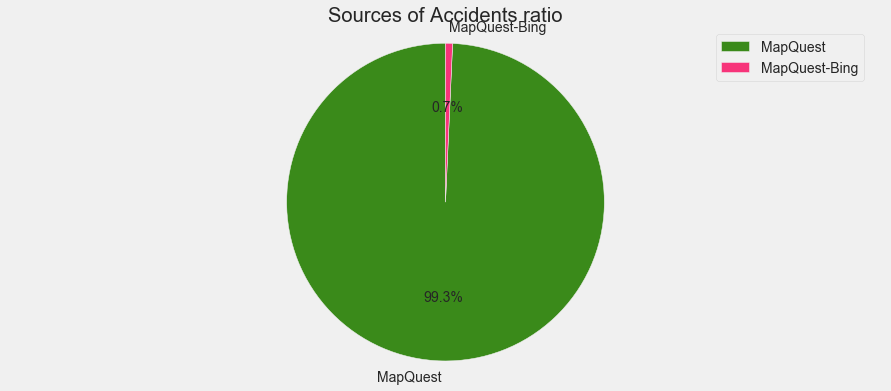

In [25]:

quest = df.loc[df['Source'] == 'MapQuest'].count()[0]
bing = df.loc[df['Source'] == 'MapQuest-Bing'].count()[0]

labels = ['MapQuest', 'MapQuest-Bing']
plt.pie([quest, bing], labels = labels, autopct = "%.1f%%",
                shadow = False, startangle = 90,  colors = ['#3a8a1a', '#f7347a'])

plt.title('Sources of Accidents ratio')
plt.legend(loc="best", bbox_to_anchor=(0.8, 1))
plt.axis('equal')
plt.show()

# Percentage Ratio of Accidents in Different Time Zone

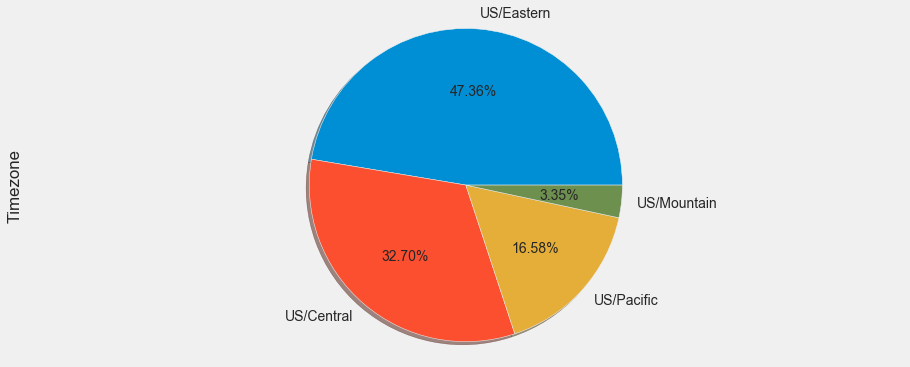

In [26]:
df['Timezone'].value_counts().plot.pie(autopct = '%1.2f%%', shadow=True)
plt.axis('equal')
plt.show()

# 5 Highest Weather for most Accidents

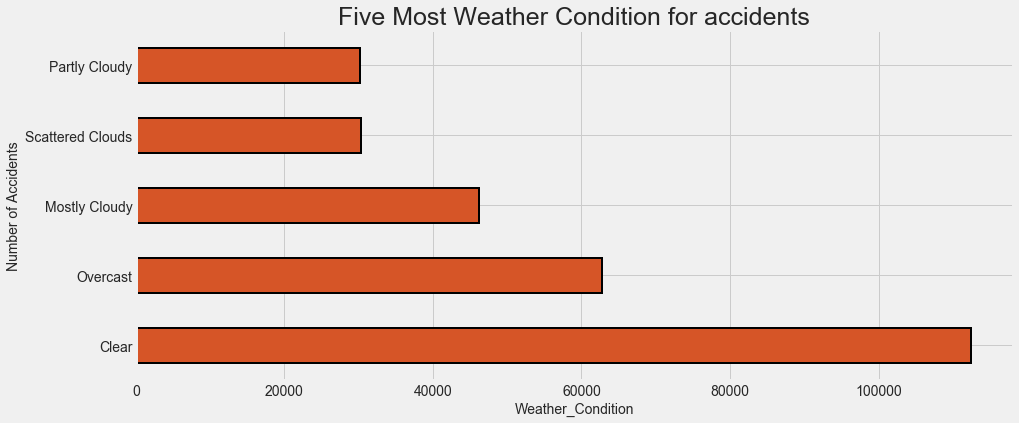

In [27]:
df['Weather_Condition'].value_counts().sort_values(ascending = False).head(5).plot(kind='barh',color = '#d65527',
                            width = 0.5, edgecolor = 'k', linewidth = 2 )

plt.xlabel('Weather_Condition', fontsize = 14)
plt.ylabel('Number of Accidents', fontsize = 14)

plt.title('Five Most Weather Condition for accidents',fontsize=25)
plt.show()